In [161]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib

In [162]:
data=yf.download("0700.hk")

[*********************100%***********************]  1 of 1 completed


In [163]:
df = data
data['6day MA'] = data['Close'].rolling(window = 6).mean()
data['12day MA'] = data['Close'].rolling(window = 12).mean()
data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
data['%R5'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 5)
data['%R10'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 10)
data['MI6']=talib.MOM(data['Close'],timeperiod=6)
data['MI12']=talib.MOM(data['Close'],timeperiod=12)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
data['EMA26']=talib.EMA(data['Close'],timeperiod=26)
data['MACD']=macd
data['TR']=talib.TRANGE(data['High'],data['Low'],data['Close'])
data['OSC6']=talib.CMO(data['Close'], timeperiod=6)
data['OSC12']=talib.CMO(data['Close'], timeperiod=12)
df['Prediction'] = data[['Close']].shift(-1)
#print data set
df=df.dropna()
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-02    0.770000    0.775000    0.740000    0.775000    0.748967   
2004-08-03    0.780000    0.795000    0.775000    0.790000    0.763463   
2004-08-04    0.780000    0.785000    0.765000    0.770000    0.744135   
2004-08-05    0.780000    0.805000    0.780000    0.795000    0.768295   
2004-08-06    0.785000    0.810000    0.785000    0.800000    0.773127   
...                ...         ...         ...         ...         ...   
2021-12-23  454.000000  468.799988  449.200012  461.799988  461.799988   
2021-12-24  460.799988  460.799988  460.799988  460.799988  460.799988   
2021-12-28  457.799988  459.200012  445.000000  450.399994  450.399994   
2021-12-29  443.600006  445.600006  440.399994  444.799988  444.799988   
2021-12-30  446.399994  450.799988  442.000000  443.399994  443.399994   

              Volume     6day MA    1

In [164]:

# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])

In [165]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
#k_features=(1,10) (It will get top 1 - 10 features best suited for prediction)
#forward=False (Backward feature selection model)
#verbose=2 (It will show details output as shown below.)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
backwardModel=sfs(RandomForestRegressor(),k_features=(1,10),forward=False,verbose=2,cv=0,n_jobs=-1,scoring='r2')
#We will convert our training data into numpy array. If we will not convert it, model is not able to read some of the column names.
backwardModel.fit(np.array(df.drop('Prediction',1)),y.ravel())

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   10.0s finished

[2022-01-01 18:34:32] Features: 17/1 -- score: 0.9998546209834135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    6.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    9.0s finished

[2022-01-01 18:34:41] Features: 16/1 -- score: 0.9998575555526465[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    6.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    7.5s finished

[2022-01-01 18:34:48] Features: 15/1 -- score: 0.9998591128151386[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    3.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.4s finished

[2022-01-01 18:34:54] Features: 14/1 -- score:

SequentialFeatureSelector(cv=0, estimator=RandomForestRegressor(),
                          forward=False, k_features=(1, 10), n_jobs=-1,
                          scoring='r2', verbose=2)

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_5101/2319062841.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  backwardModel.fit(np.array(df.drop('Prediction',1)),y.ravel())
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    9.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   14.3s finished

[2022-01-01 18:35:49] Features: 18/1 -- score: 0.999860532810227[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   12.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   16.5s finished

[2022-01-01 18:36:05] Features: 17/1 -- score: 0.9998582740486645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:   10.

SequentialFeatureSelector(cv=0, estimator=RandomForestRegressor(),
                          forward=False, k_features=(1, 10), n_jobs=-1,
                          scoring='r2', verbose=2)

In [192]:
df.columns[list(backwardModel.k_feature_idx_)]

Index(['Open', 'Adj Close', '6day MA', '12day MA', 'EMA12', 'EMA26', 'OSC12'], dtype='object')

In [167]:
X = df[df.columns[list(backwardModel.k_feature_idx_)]]
x_unseen=X[-100:]
X = X[:-100]
y_unseen=y[-100:]
y = y[:-100]
X.head()

,Low,Close,Volume,6day MA,12day MA,RSI,%R5,EMA26,MACD,OSC12
Date,,,,,,,,,,
2004-08-02,0.740,0.775,26760000,0.742500,0.739167,58.915809,-0.000000,0.784088,-0.028262,3.119936
2004-08-03,0.775,0.790,63695000,0.760833,0.743333,63.753690,-6.666661,0.784526,-0.023442,9.773109
2004-08-04,0.765,0.770,14245000,0.765000,0.744583,53.883580,-33.333386,0.783450,-0.020995,-0.196268
2004-08-05,0.780,0.795,33925000,0.775000,0.748333,62.377702,-15.384601,0.784306,-0.016843,10.844935
2004-08-06,0.785,0.800,21670000,0.783333,0.752083,63.927979,-14.285702,0.785468,-0.013000,12.938133


,Open,Adj Close,6day MA,12day MA,EMA12,EMA26,OSC12
Date,,,,,,,
2004-08-02,0.770,0.748967,0.742500,0.739167,0.753609,0.784088,3.119936
2004-08-03,0.780,0.763463,0.760833,0.743333,0.759207,0.784526,9.773109
2004-08-04,0.780,0.744135,0.765000,0.744583,0.760868,0.783450,-0.196268
2004-08-05,0.780,0.768295,0.775000,0.748333,0.766119,0.784306,10.844935
2004-08-06,0.785,0.773127,0.783333,0.752083,0.771331,0.785468,12.938133


In [168]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [169]:
regr=make_pipeline(MinMaxScaler(feature_range=(-1,1)),RandomForestRegressor())
regr.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(-1, 1))),
                ('randomforestregressor', RandomForestRegressor())])

Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(-1, 1))),
                ('randomforestregressor', RandomForestRegressor())])

In [181]:
y_pred=regr.predict(x_test)

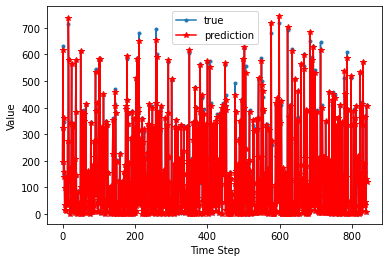

In [182]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [183]:
mean_absolute_percentage_error(y_test,y_pred)

0.020065547907102247

In [184]:
r2_score(y_test,y_pred)

0.9990134149717167

In [185]:
mean_squared_error(y_test,y_pred,squared=False)

5.315845400539137

In [186]:
unseend_pred = regr.predict(x_unseen)

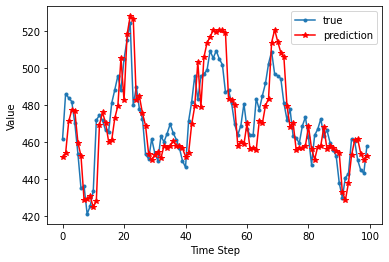

In [187]:
plt.plot(y_unseen, marker='.', label="true")
plt.plot(unseend_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [188]:
mean_absolute_percentage_error(y_unseen,unseend_pred)

0.0228965601290647

In [189]:
r2_score(y_unseen,unseend_pred)

0.5734571772866757

In [190]:
mean_squared_error(y_test,y_pred,squared=False)

5.315845400539137

In [191]:
x_unseen

,Open,Adj Close,6day MA,12day MA,EMA12,EMA26,OSC12
Date,,,,,,,
2021-08-06,444.799988,453.600006,458.233332,474.966667,475.388205,507.534563,-28.422003
2021-08-09,447.799988,461.600006,455.333333,468.100001,473.266944,504.132003,-22.637906
2021-08-10,478.000000,486.200012,457.200002,464.366669,475.256647,502.803708,-6.540861
2021-08-11,490.200012,484.000000,463.533335,463.866669,476.601778,501.410840,-7.722529
2021-08-12,482.600006,482.000000,467.733337,466.866669,477.432274,499.973000,-8.865279
...,...,...,...,...,...,...,...
2021-12-23,454.000000,461.799988,444.366664,454.283330,452.692079,460.916855,2.510875
2021-12-24,460.799988,460.799988,445.733327,453.766663,453.939450,460.908198,1.414574
2021-12-28,457.799988,450.399994,447.799993,451.916662,453.394918,460.129812,-9.558981
